<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 目標：
  * 學習 BASEMAP 的進階應用
* 重點： 
  * 導入 PANDAS，利用 PANDAS 的數據繪製關係圖
  * 如何自行輸入經緯度繪製所在區域的地圖
  * 學習如何讀取氣象資訊檔：netCDF4

In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Basemap 地圖資訊圖

* 繪製基本圖：創建圖像物件，設置圖像大小與軸線起始位置
  * 選擇繪製的區域，由於繪製美國地圖，故選取如下經緯度，lat_0 和 lon_0 是地圖中心的緯度和經度
  * 設定
    * 地圖圖片大小寬度：llcrnrlat=23.41, urcrnrlat=45.44
    * 地圖大小縱度：llcrnrlon=-118.67, urcrnrlon=-64.52
* 繪製邊界(含經緯度計算與繪製)
  * 繪製
    * 邊界：map.drawmapboundary()
    * 州：map.drawstates()
    * 海岸線：map.drawcoastlines()
    * 國家：map.drawcountries()
    * 縣：map.drawcounties()
  * 設定緯線區間：parallels = np.arange(0., 90, 10.)
  * 繪製緯線：map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10)
  * 設定經線區間：meridians = np.arange(-110., -60., 10.)
  * 繪製經線：map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10)
* 讀取數據並取得資料集資訊
  * 方法一
    ```
    Data = pd.read_csv('*.csv')
    Data.info()
    Data.head()
    ```
  * 方法二：導入 netCDF4 的 Dataset 處理網路運用資料格式
    ```
    nc = NetCDFFile('*.nc')
    print(nc.variables.keys())  # 輸出查看資料中的變數名
    ```
* 整理數據並添加數據至基本地圖
  * 資料清洗與整理
    * 標準化資料
    * 針對區域性資料提取經緯度參數
      ```
      x, y = m(lons, lats)   #以x, y為基準畫出 data 的輪廓線
      clevs = [........]     #等輪廓線參數為 clevs，填充顏色畫出填充後的輪廓線
      ```
* 圖像輸出
  * 直接輸出
    ```
    map.scatter(x, y, s=size)   
    # 也可以使用 Basemap 的 methord 本身的 scatter
    cbar = m.colorbar(cs, location='bottom', pad='5%')
    # 添加色標，每個色標占 5% (一共 20 個色標)
    cbar.set_label('mm') 
    # 添加標籤，單位：毫米
    plt.title(prcpvar.long_name + 'for period ending' + prcpvar.dateofdata)
    plt.title('Population distribution in America')
    # 添加圖像名
    ```
* 觀察圖像與核對所取得的資訊是否符合

* 散點 Basemap.scatter()
* 畫大圓弧 Basemap.drawgreatcircle()
  * 我們將地震震中和地震台站連起來，由於地圖投影方式不同，畫出來的曲線形態存在差異，一般大圓弧都是彎曲的
* 畫熱力圖 Basemap.pcolormesh()
  * 有時候我們需要將二維的熱力圖畫在地圖之上，比如大地震發生後產生海嘯，波在海面表現出的波浪形態。現生成二維資料，再將之畫在地圖之上
* 等值線圖 Basemap.contourf()和Basemap.contour()

## 繪製城市人口地圖

* 繪製美國在 2014 年的人口分佈圖

In [14]:
# 導入數據集
posi = pd.read_csv('2014_us_cities.csv') # 讀取數據

#取得資料集資訊
posi.info()
posi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3228 non-null   object 
 1   pop     3228 non-null   int64  
 2   lat     3228 non-null   float64
 3   lon     3228 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 101.0+ KB


,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789


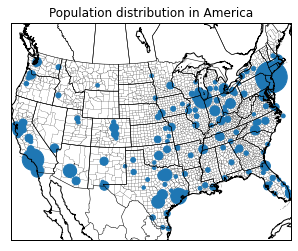

In [16]:
# 原始資料有3228組資料，選擇了280個城市的資料
lat = np.array(posi["lat"][0:280]) # 獲取維度之維度值
lon = np.array(posi["lon"][0:280]) # 獲取經度值
pop = np.array(posi["pop"][0:280],dtype=float) # 獲取人口數，轉化為numpy浮點型

map = Basemap(projection='stere', lat_0=90, lon_0=-105,
            llcrnrlat=23.41 , urcrnrlat=45.44,
            llcrnrlon=-118.67, urcrnrlon=-64.52,
            rsphere=6371200., resolution='l', area_thresh=10000)

map.drawmapboundary()   # 繪製邊界
map.drawstates()        # 繪製州
map.drawcoastlines()    # 繪製海岸線
map.drawcountries()     # 繪製國家
map.drawcounties()      # 繪製縣

# 繪製散點圖時圖形的大小，如果之前pop不轉換為浮點型會沒有大小不一的效果
size=(pop/np.max(pop))*1000 

x,y = map(lon, lat)

map.scatter(x, y, s=size)

plt.title('Population distribution in America')
plt.show()

* 由上圖可以直觀看出紐約、三藩市、芝加哥、華盛頓是美國人口數量最多的城市

## 從鍵盤取得經緯度中心點

In [17]:
# 為地球靜止(衛星視圖)投影創建底圖實例。
lon_0 = float(input('enter reference longitude (lon_0):'))

enter reference longitude (lon_0): 128


Text(0.5, 1.0, 'Geostationary Map Centered on Lon=128.0')

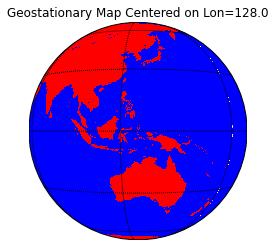

In [18]:
#繪製有陸地/海面遮罩的地圖。
fig=plt.figure()

# 把剛剛的 lon_0 代入並畫圖
m = Basemap(projection='geos', lon_0=lon_0, rsphere=(6378137.00,6356752.3142), resolution=None)

m.drawlsmask(land_color='red', ocean_color='blue', lakes=True)

# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary()
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))

enter reference longitude (lon_0):70


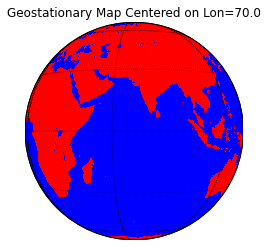

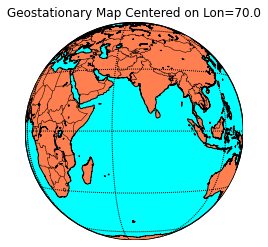

In [ ]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import sys

def get_input(prompt):
    if sys.hexversion > 0x03000000:
        return input(prompt)
    else:
        return raw_input(prompt)

# 為地球靜止(衛星視圖)投影創建底圖實例。
lon_0 = float(get_input('enter reference longitude (lon_0):'))

#繪製有陸地/海面遮罩的地圖。
fig=plt.figure()
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution=None)
# 繪製 land-sea 遮罩, 顏色: land red, oceans blue.
# lakes=True: 表示真實塗色, 給定 ocean color.
m.drawlsmask(land_color='red',ocean_color='blue',lakes=True)
# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary()
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))

# 會至第貳個地圖
# 繪製和填充大陸的地圖。
fig = plt.figure()
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcountries()
# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))
plt.show()

In [5]:
#載入氣象資訊檔, 提供解讀檔案資訊
!pip install netCDF4
from netCDF4 import Dataset as NetCDFFile # 若沒有報錯即安裝完成即可使用

You should consider upgrading via the 'C:\Users\jiao\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
# 導入資料庫與套件
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [20]:
# 利用 netCDF 中的 Dataset 獲取我們載下的檔案並去使用它，這裡是載 MERRA2_200.tavgM_2d_slv_Nx.199907.nc4 (可選)
data = Dataset('MERRA2_200.tavgM_2d_slv_Nx.199907.nc4', mode='r')

# 其實 data 就是一個字典
data.variables.keys()

dict_keys(['lon', 'lat', 'time', 'CLDPRS', 'CLDTMP', 'DISPH', 'H1000', 'H250', 'H500', 'H850', 'OMEGA500', 'PBLTOP', 'PS', 'Q250', 'Q500', 'Q850', 'QV10M', 'QV2M', 'SLP', 'T10M', 'T250', 'T2M', 'T2MDEW', 'T2MWET', 'T500', 'T850', 'TO3', 'TOX', 'TQI', 'TQL', 'TQV', 'TROPPB', 'TROPPT', 'TROPPV', 'TROPQ', 'TROPT', 'TS', 'U10M', 'U250', 'U2M', 'U500', 'U50M', 'U850', 'V10M', 'V250', 'V2M', 'V500', 'V50M', 'V850', 'ZLCL', 'Var_CLDPRS', 'Var_CLDTMP', 'Var_DISPH', 'Var_H1000', 'Var_H250', 'Var_H500', 'Var_H850', 'Var_OMEGA500', 'Var_PBLTOP', 'Var_PS', 'Var_Q250', 'Var_Q500', 'Var_Q850', 'Var_QV10M', 'Var_QV2M', 'Var_SLP', 'Var_T10M', 'Var_T250', 'Var_T2M', 'Var_T2MDEW', 'Var_T2MWET', 'Var_T500', 'Var_T850', 'Var_TO3', 'Var_TOX', 'Var_TQI', 'Var_TQL', 'Var_TQV', 'Var_TROPPB', 'Var_TROPPT', 'Var_TROPPV', 'Var_TROPQ', 'Var_TROPT', 'Var_TS', 'Var_U10M', 'Var_U250', 'Var_U2M', 'Var_U500', 'Var_U50M', 'Var_U850', 'Var_V10M', 'Var_V250', 'Var_V2M', 'Var_V500', 'Var_V50M', 'Var_V850', 'Var_ZLCL'])

In [21]:
# 設定經緯度，並讀入 T2M (兩公尺的溫度變數)
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
T2M = data.variables['T2M'][:,:,:]

In [22]:
# 若在文件中使用多個時間索引的 MERRA-2 數據，以下將提取第一個時間索引。
T2M = T2M[0,:,:]

In [23]:
T2M

masked_array(
  data=[[212.2957 , 212.2957 , 212.2957 , ..., 212.2957 , 212.2957 ,
         212.2957 ],
        [210.59361, 210.58603, 210.57803, ..., 210.6178 , 210.60963,
         210.60204],
        [210.81534, 210.8219 , 210.82805, ..., 210.79088, 210.80016,
         210.80803],
        ...,
        [273.55505, 273.55466, 273.55426, ..., 273.55597, 273.5557 ,
         273.55533],
        [273.44537, 273.44476, 273.44434, ..., 273.44693, 273.44635,
         273.4458 ],
        [273.40717, 273.40717, 273.40717, ..., 273.40717, 273.40717,
         273.40717]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

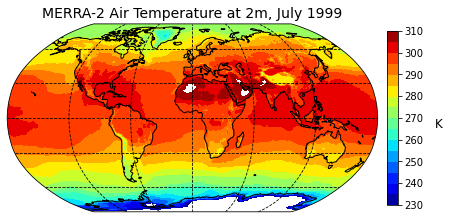

In [12]:
# 設置圖形大小，投影和範圍
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())   # 在羅賓森投影上使用繪圖函數
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)   # 解析度為粗糙
ax.gridlines(linestyle='--',color='black')

# 設置輪廓線級別，接著繪製圖和顏色欄
clevs = np.arange(230,311,5)
plt.contourf(lon, lat, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Air Temperature at 2m, July 1999', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

dict_keys(['amountofprecip', 'lat', 'lon', 'true_lat', 'true_lon', 'timeofdata', 'timeofcreation', 'hrap_xor', 'hrap_yor'])


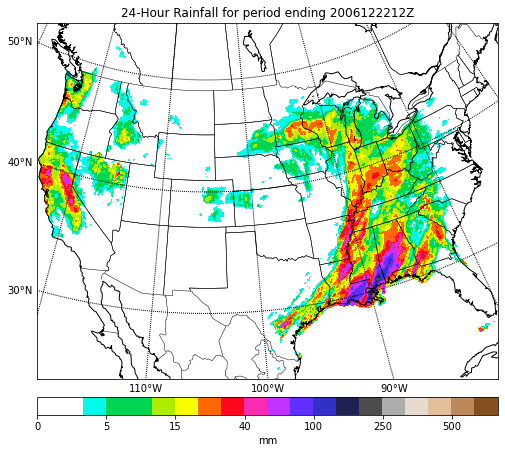

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.basemap import Basemap, cm
# cm(colormap)庫提供一系列彩色地圖
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
#同上文，導入numpy, matplotlib.pyplot，導入netCDF4中的Dataset處理網路通用
#資料格式（net common data form）

nc = NetCDFFile('nws_precip_conus_20061222.nc')
#首先在http://water.weather.gov/precip/中下載2006年12月22日的美國本土
#（不含阿拉斯加與夏威夷）的降水量數據
#導入我們需要用到的dataset， 值得注意的是該網站17年3月後的資料格式更新， 
#通過查詢變數名發現資料格式與之前有很大差異
print(nc.variables.keys())
# 輸出查看資料中的變數名
# 取得變數的值, 並放入陣列
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()


# 標準化降水量與提取經緯度參數
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#創建圖像物件，設置圖像大小與軸線起始位置 
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)

#畫立體投影圖， 設置圖形上下左右四個邊界點經緯度參數座標，中心點經緯度參
#數座標,定義地圖投影的球面半徑(預設值為6370997米，近似於地球的半徑），
#解析度以及閾值 
# 注: area_thresh = 10000 意味著面積小於10000平方公里的湖泊等對象將不被作圖
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# 畫海岸線，州界， 國界線
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
#以10度為間隔畫出0度到北緯90度緯線， 並且在圖像左側設置緯線標籤
meridians = np.arange(180.,360.,10.)
#以10度為間隔畫出西經180度到本初子午線經線， 並且在圖像下側設置經線標籤
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny)
# 經緯線空間均勻
x, y = m(lons, lats) 
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# 添加參數表，以x,y為基準畫出data的輪廓線，等輪廓線參數為clevs，填充顏色畫出填充後的輪廓線
cbar = m.colorbar(cs,location='bottom',pad="5%")
#添加色標, 每個色標占5%（一共20個色標）
cbar.set_label('mm')
# 添加標籤 單位：毫米
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
# 添加圖像名
plt.show()
plt.savefig('Homework_025_24hrs rainfall of 20061222 for CONUS.jpg')
